Challenge:
    
In this module, we learned how to approach and solve regression problems using linear regression models. Throughout the module, you worked on a house price dataset from Kaggle. In this challenge, you will keep working on this dataset.

The scenario
The housing market is one of the most crucial parts of the economy for every country. Purchasing a home is one of the primary ways to build wealth and savings for people. In this respect, predicting prices in the housing market is a very central topic in economic and financial circles.

The house price dataset from Kaggle includes several features of the houses along with their sale prices at the time they are sold. So far, in this module, you built and implemented some models using this dataset.

In this challenge, you are required to improve your model with respect to its prediction performance.

To complete this challenge, submit a Jupyter notebook containing your solutions to the following tasks.

Steps:
- Load the houseprices data from Thinkful's database.

In [1]:
# Import some packages:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.mlab
import scipy.stats as atats
from scipy.stats import jarque_bera
from scipy.stats import boxcox
from scipy.stats import normaltest
import math
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse,rmse
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.preprocessing import normalize, scale, StandardScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sqlalchemy import create_engine

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# Connect to the data base:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format( postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from houseprices', con=engine)
engine.dispose()

- Do data cleaning, exploratory data analysis, and feature engineering. You can use your previous work in this module. But make sure that your work is satisfactory.

In [3]:
# Look at the dataset:
df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.00,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [4]:
# Exploring Nulls and type of data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [ ]:
# Look at the shape:
df.shape

In [ ]:
# Find out number of uniquevalue and notnull in each columns:
df.nunique()

In [ ]:
# Find out unique value in each column:
for column_name in df.columns:
    print("Unique values in column {} are: {}".format(column_name, df[column_name].unique()))

In [3]:
# Findout missing values:
sum_null_columns = df.isnull().sum().sort_values(ascending=False)
percent_null_columns = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([sum_null_columns, percent_null_columns], axis=1, keys=['sum_null_columns', 'percent_null_columns'])
missing_data.head(20)

,sum_null_columns,percent_null_columns
poolqc,1453,99.52
miscfeature,1406,96.30
alley,1369,93.77
fence,1179,80.75
fireplacequ,690,47.26
lotfrontage,259,17.74
garagecond,81,5.55
garagetype,81,5.55
garageyrblt,81,5.55
garagefinish,81,5.55


In [4]:
# Dropping columns which have more than 45% missing values:
cols = df.columns[df.isnull().sum()*100/df.isnull().count()>45.00]
df = df.drop(cols, axis=1)

For checking if the missing values are at random or there is a business meaning have to check relationship between missing values and target variable by using scatter plot.

In [ ]:
# Look at the shape again:
df.shape

In [5]:
# Clean dataset by droping duplicates:  
df.drop_duplicates(inplace=True) 

In [ ]:
# Get statistical information summary for numerical columns:
df.describe()

In [6]:
# Get statistical information summary for nonnumerical columns:
df.describe(include=['O'])

,mszoning,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,...,electrical,kitchenqual,functional,garagetype,garagefinish,garagequal,garagecond,paveddrive,saletype,salecondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1459,1460,1460,1379,1379,1379,1379,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,...,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,...,1334,735,1360,870,605,1311,1326,1340,1267,1198


In [7]:
# Findout numeric columns:
numeric_columns = df.select_dtypes(exclude=['object']).columns
print(numeric_columns)
print('Number of numeric columns is {}'.format(len(numeric_columns)))

Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch',
       'poolarea', 'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')
Number of numeric columns is 38


In [8]:
# Filling numeric columns:
for column in numeric_columns:
    df.loc[:,numeric_columns] = df.loc[:,numeric_columns].interpolate()

In [9]:
# Findout nonnumeric columns:
nonnumeric_columns=df.select_dtypes('object').columns
print(nonnumeric_columns)
print('number of nonnumeric columns is {}'.format(len(nonnumeric_columns)))

Index(['mszoning', 'street', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'garagetype', 'garagefinish', 'garagequal', 'garagecond',
       'paveddrive', 'saletype', 'salecondition'],
      dtype='object')
number of nonnumeric columns is 38


In [10]:
# Filling nonnumeric columns:
for i in range(1,len(df)):
    df.loc[i,nonnumeric_columns]=df.loc[i,nonnumeric_columns].fillna(df.loc[i-1,nonnumeric_columns])

As you know, in this dataset, saleprice is target variable and we want to predict the prices of the houses.

In [ ]:
# Look at the distribution of target variable(saleprice):
plt.hist(df.saleprice)
plt.title("The distribution of saleprice")
plt.xlabel("saleprice")
plt.ylabel("number of occurrence")
plt.show()

As you can see here, the distribution of target variable is not normal and it is right skewed. Also, the majority of the observations have low saleprice values and few of the observations have high saleprice values. This makes the distribution of the target variable clustered at the left-most part of the histogram. 

In [ ]:
# Look at the correlationship between target variable and countinus columns:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2f')

As shown here, saleprice has strong correlation with overallqual and grlivarea.

In [ ]:
# Look at the distribution of numeric columns:
plt.figure(figsize=(25,50))
for i,column in enumerate(numeric_columns):
    plt.subplot(11, 4, i+1)
    plt.boxplot(df[column],whis=1.5)
    plt.title(f'distribution of {column}')
    plt.xticks(rotation=90)
plt.subplots_adjust(hspace = 0.8, top = 0.7)
plt.show()

As you can see, some of numeric columns have outliers.

In [ ]:
# Look at the distribution of target variable with numeric columns:
plt.figure(figsize=(25,50))
for i,column in enumerate(numeric_columns):
    plt.subplot(11, 4, i+1)
    plt.scatter(df[column], df['saleprice'])
    plt.title(f'distribution of slae price by {column}')
    plt.xticks(rotation=90)
plt.subplots_adjust(hspace = 0.8, top = 0.7)
plt.show()

As shown, overallqual, grlivarea, garagcars, garagarea, totalbsmtsf, firstflrsf columns have fairly linear relationship with saleprice.

Now, look at the categorical variables to findout variables with wide range of the saleprice.

In [ ]:
# Look at the distribution of target variable with nonnumeric columns:
plt.figure(figsize=(25,50))
for i,column in enumerate(nonnumeric_columns):
    plt.subplot(11, 4, i+1)
    sns.barplot(df[column], df['saleprice'])
    plt.title(f'distribution of slae price by {column}')
    plt.xticks(rotation=90)
plt.subplots_adjust(hspace = 0.8, top = 0.7)
plt.show()

As shown, exterqual, roofmatl, garagequal, condition2 have wider range of saleprice.

In [ ]:
# Look at the distribution of nonnumeric columns with saleprice:
plt.figure(figsize=(25,50))
for i,column in enumerate(nonnumeric_columns):
    plt.subplot(11, 4, i+1)
    sns.boxplot(x= df[column], y='saleprice', data = df)
    plt.title(f'distribution of {column} with saleprice')
    plt.xticks(rotation=90)
plt.subplots_adjust(hspace = 0.8, top = 0.7)
plt.show()

By looking at the boxplot of categorical variables and saleprice, we foundout neighborhood, condition2, roofmatl, exterior2nd, exterqual, kitchenqual, bsmtqual have highest median of saleprice. 

In [ ]:
# Look at the distribution of Average saleprice with nonnumeric columns:
plt.figure(figsize=(25,50))
for i,column in enumerate(nonnumeric_columns):
    plt.subplot(11, 4, i+1)
    sns.barplot(df.groupby(column)["saleprice"].mean().sort_values(ascending=False).index, df.groupby(column)["saleprice"].mean().sort_values(ascending=False))
    plt.title(f"Distribution of average saleprice by {column}")
    plt.ylabel("Avg saleprice")
    plt.xticks(rotation=90)
plt.subplots_adjust(hspace = 0.8, top = 0.7)
plt.show()


as shown, neighborhood, condition2, roofmatl, exterior2nd, exterqual, kitchenqual, bsmtqual have highest range of average saleprice. 

The categorical variables are strings and we need to convert them to numerical values.

In [11]:
# Put nonnumeric columns in variable:
categorical = df.select_dtypes(include=['object'])
categorical.head()

,mszoning,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,...,electrical,kitchenqual,functional,garagetype,garagefinish,garagequal,garagecond,paveddrive,saletype,salecondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [12]:
# Convert nonnumeric columns to numbers by using dummies:
dummies = pd.get_dummies(categorical, drop_first=True)
dummies.head()

,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave,lotshape_IR2,lotshape_IR3,lotshape_Reg,landcontour_HLS,landcontour_Low,...,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [13]:
# drop nonnumeric columns: 
df = df.drop(list(categorical.columns), axis=1)
df.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
0,1,60,65.00,8450,7,5,2003,2003,196.00,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.00,9600,6,8,1976,1976,0.00,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.00,11250,7,5,2001,2002,162.00,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.00,9550,7,5,1915,1970,0.00,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.00,14260,8,5,2000,2000,350.00,655,...,192,84,0,0,0,0,0,12,2008,250000


In [14]:
# Concat dummies variables with dataset:
df = pd.concat([df, dummies], axis=1)
df.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
0,1,60,65.00,8450,7,5,2003,2003,196.00,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.00,9600,6,8,1976,1976,0.00,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.00,11250,7,5,2001,2002,162.00,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.00,9550,7,5,1915,1970,0.00,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.00,14260,8,5,2000,2000,350.00,655,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
# Look at the shape again:
df.shape

In [ ]:
# For meodeling we have to assume the target variable to be normally distributed, so we can use standardized:
df["scaled_saleprice"] = scale(df["saleprice"])

plt.hist(df.scaled_saleprice)
plt.title("The distribution of scaled_saleprice")
plt.xlabel("scaled_saleprice")
plt.ylabel("number of occurrence")
plt.show()

In [ ]:
# Draw the scatter plot.
plt.scatter(df["saleprice"], df["scaled_saleprice"])
plt.title("scatterplot of orginal and standardized values of saleprice")
plt.xlabel("orginal saleprice value")
plt.ylabel("saleprice value (standardized)")

In [ ]:
# Use eig_val plot to know how many component describe more percentage of variance in the dataset:
x= df
x=StandardScaler().fit_transform(x)
Xt = x.T
Cx = np.cov(Xt)
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)
# print scree plot
plt.plot(eig_val_cov)
plt.show()

#print(eig_val_cov)

As you can see, around 50 components have lots of variance.

In [ ]:
# Look at the correlation between saleprice and all columns:
np.abs(df.iloc[:,:].corr().loc[:,"saleprice"]).sort_values(ascending=False)

Now modeling the saleprice houses. I choose 5 high correlationship variables between target variable and continuse variables; also, I choose two high correlationship of categorical variables with target variable, then using all of them to model.  

saleprice:y = 𝛽0+𝛽1 overallqual + 𝛽2 grlivarea + 𝛽3 garagecars + 𝛽4 garagearea + 𝛽5 totalbsmtsf +𝛽6 exterqual_TA +𝛽7 kitchenqual_TA +𝜖

In [15]:
# Now we build a model:

# Y is the target variable:
Y = df['saleprice']
# X is the feature set:
X = df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', 'exterqual_TA', 'kitchenqual_TA']]

- Now, split the data into train and test sets where 20% of the data resides in the test set.

In [16]:
# Split dataset:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


In [17]:
# We create a LinearRegression model with statsmodels' sm:

# We need to manually add a constant in statsmodels' sm
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     540.4
Date:                Wed, 19 Feb 2020   Prob (F-statistic):               0.00
Time:                        18:42:14   Log-Likelihood:                -13979.
No. Observations:                1168   AIC:                         2.797e+04
Df Residuals:                    1160   BIC:                         2.801e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -6.367e+04   8294.165     -7.

- All explanatory variables are  statistically significant except garagarea, because their p_values are less than 0.05. 
- R-squared is a proportion (between 0 and 1) that expresses how much variance in the outcome variable is explained by the explanatory variables in the model.
- Adjusted R-squared does the same job as R-squared, but it is adjusted according to the number of features included in the model, because,R-squared is biased as it tends to increase with the number of explanatory variables,use Adjusted R-squared.

- So, in this model: 
- R-squared and Adjusted R-squared of the models are 0.77 which means around 77% of the variance in the target variable explaind  by explanatory variables in the model and around 23% of the variance is unexplained. So, there is space for improvement.
- F_test is 540.4 and p_value is 0
- AIC is 27970 and BIC is 28010.

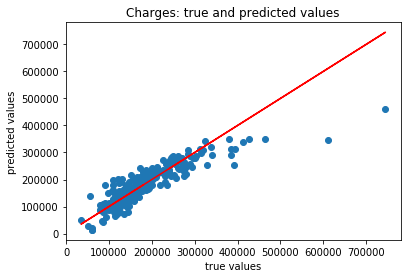

Mean absolute error of the prediction is: 25427.91243226192
Mean squared error of the prediction is: 1514301879.3381054
Root mean squared error of the prediction is: 38914.03190801623
Mean absolute percentage error of the prediction is: 15.340718552575808


In [18]:
# Now we predict:

# We add constant to the model for test dataset:
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()


print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))



Although these are different metrics, they are essentially using the difference between what we know to be correct saleprice house and predicted one from the model. So, lower values are desirable for all four metrics. The lower the value, the better the performance of the model. Also, model seems to better predicts low values because the points are more tightly clustered around the red line.

In [19]:
# Now remove all explanatory variables which are statistically nonsignificant from model:

# Y is the target variable:
Y = df['saleprice']
# X is the feature set:
X = df[['overallqual', 'grlivarea', 'garagecars', 'totalbsmtsf', 'exterqual_TA', 'kitchenqual_TA']]

# Split dataset:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


In [20]:
# We create a LinearRegression model with statsmodels' sm:

# We need to manually add a constant in statsmodels' sm:
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     629.2
Date:                Wed, 19 Feb 2020   Prob (F-statistic):               0.00
Time:                        18:42:45   Log-Likelihood:                -13980.
No. Observations:                1168   AIC:                         2.797e+04
Df Residuals:                    1161   BIC:                         2.801e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -6.357e+04   8299.161     -7.

So, in this model:

- All explanatory variables are statistically significan.

- R-squared and Adjusted R-squared of the models are 0.77 which means around 77% of the variance in the target variable explaind by explanatory variables in the model and around 23% of the variance is unexplained. So, there is space for improvement.

- F_test is 629.2 and p_value is 0.

- AIC is 27970 and BIC is 28010.

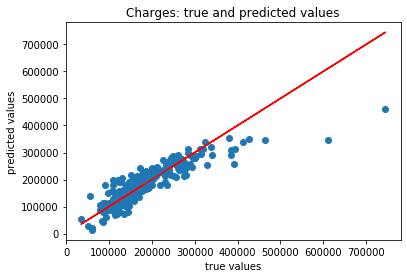

Mean absolute error of the prediction is: 25541.75503723159
Mean squared error of the prediction is: 1515227686.7015226
Root mean squared error of the prediction is: 38925.92563705483
Mean absolute percentage error of the prediction is: 15.432398379179151


In [21]:
# Now we predict:

# We add constant to the model for test dataset:
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()


print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))



Although these are different metrics, they are essentially using the difference between what we know to be correct saleprice house and predicted one from the model. So, lower values are desirable for all four metrics. The lower the value, the better the performance of the model. Also, model seems to better predicts low values because the points are more tightly clustered around the red line.

In [22]:
# We fit an OLS model using sklearn:
lrm = LinearRegression()
lrm.fit(X_train, y_train)


# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in the training set is: 0.7648068127712628
-----Test set statistics-----
R-squared of the model in the test set is: 0.7743082404503734
Mean absolute error of the prediction is: 25541.75503723171
Mean squared error of the prediction is: 1515227686.7015862
Root mean squared error of the prediction is: 38925.92563705565
Mean absolute percentage error of the prediction is: 15.432398379179196


As we see, the R-squared of the model in the training set is 0.76; also, R-squared of the model in the test set is 0.77.


- Build several linear regression models including Lasso, Ridge, or ElasticNet and train them in the training set. Use k-fold cross-validation to select the best hyperparameters if your models include one!

In [ ]:
# LassoCV regression:

alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)] 

lassoregr = LassoCV(alphas=alphas, cv=5) 
lassoregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("Best alpha value is: {}".format(lassoregr.alpha_))
print("R-squared of the model on the training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


 As we see, the R-squared of the model in the training set is 0.76; also, R-squared of the model in the test set is 0.77.


In [ ]:
# Fitting a ridge regression model. 
ridgeregr = RidgeCV(alphas=alphas, cv=5)
ridgeregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)

print("Best alpha value is: {}".format(ridgeregr.alpha_))
print("R-squared of the model on the training set is: {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ridgeregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


As we see, the R-squared of the model in the training set is 0.76; also, R-squared of the model in the test set is 0.77.


In [ ]:
# ElasticNet regression:
elasticregr = ElasticNetCV(alphas=alphas, cv=5)
elasticregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)

print("Best alpha value is: {}".format(elasticregr.alpha_))
print("R-squared of the model on the training set is: {}".format(elasticregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))



As we see, the R-squared of the model in the training set is 0.76; also, R-squared of the model in the test set is 0.77.


- Evaluate your best model on the test set.

I think the Ridge regression model is the best one,because these four different metrics are essentially using for the difference between what we know to be correct saleprice house and predicted one from the model. So, lower values are desirable for all four metrics. The lower the value, the better the performance of the model. So, in Ridge regression model values for all four metrics are lower than others.

- So far, you have only used the features in the dataset. However, house prices can be affected by many factors like economic activity and the interest rates at the time they are sold. So, try to find some useful factors that are not included in the dataset. Integrate these factors into your model and assess the prediction performance of your model. Discuss the implications of adding these external variables into your model.

I think, we can add some other factors such as interest rates, the duration of loan payment, loan prepayment amount, recession and world economic condition.

For answer this part: I merge this dataset with the dataset includes data on the economic conditions in the United States since 1954 to 2017, and integrate these factors in the model and assess the prediction performance of the model.

In [24]:
# Load new dataset:
df1 = pd.read_csv(r'C:\Users\mebra.DESKTOP-L12LJA6\Thinkful Works\PythonThinkful\index.csv')

In [25]:
# Look at the new dataset:
df1.head()

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1954,7,1,nan,nan,nan,0.80,4.60,5.80,nan
1,1954,8,1,nan,nan,nan,1.22,nan,6.00,nan
2,1954,9,1,nan,nan,nan,1.06,nan,6.10,nan
3,1954,10,1,nan,nan,nan,0.85,8.00,5.70,nan
4,1954,11,1,nan,nan,nan,0.83,nan,5.30,nan


In [26]:
df.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
0,1,60,65.00,8450,7,5,2003,2003,196.00,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.00,9600,6,8,1976,1976,0.00,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.00,11250,7,5,2001,2002,162.00,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.00,9550,7,5,1915,1970,0.00,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.00,14260,8,5,2000,2000,350.00,655,...,0,0,0,0,1,0,0,0,1,0


In [13]:
# Find out number of unique value in each column:
for column_name in df1.columns:
    print("Unique values in column {} are: {}".format(column_name, df1[column_name].nunique()))

Unique values in column Year are: 64
Unique values in column Month are: 12
Unique values in column Day are: 29
Unique values in column Federal Funds Target Rate are: 63
Unique values in column Federal Funds Upper Target are: 4
Unique values in column Federal Funds Lower Target are: 4
Unique values in column Effective Federal Funds Rate are: 466
Unique values in column Real GDP (Percent Change) are: 113
Unique values in column Unemployment Rate are: 71
Unique values in column Inflation Rate are: 106


In [14]:
# Exploring Nulls and type of new dataset:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 10 columns):
Year                            904 non-null int64
Month                           904 non-null int64
Day                             904 non-null int64
Federal Funds Target Rate       462 non-null float64
Federal Funds Upper Target      103 non-null float64
Federal Funds Lower Target      103 non-null float64
Effective Federal Funds Rate    752 non-null float64
Real GDP (Percent Change)       250 non-null float64
Unemployment Rate               752 non-null float64
Inflation Rate                  710 non-null float64
dtypes: float64(7), int64(3)
memory usage: 70.7 KB


In [27]:
# Rename the yrsold column to Year:
df = df.rename(columns={"yrsold" : "Year"})

In [28]:
df['Year'].unique()

array([2008, 2007, 2006, 2009, 2010], dtype=int64)

In [29]:
df1['Year'].unique()

array([1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

In [30]:
# Merge two dataset:
df = df.merge(df1, on = 'Year')

In [31]:
# Look at the dataset:
df.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,salecondition_Partial,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1,60,65.00,8450,7,5,2003,2003,196.00,706,...,0,1,1,4.25,nan,nan,3.94,-2.70,5.00,2.50
1,1,60,65.00,8450,7,5,2003,2003,196.00,706,...,0,1,22,3.50,nan,nan,nan,nan,nan,nan
2,1,60,65.00,8450,7,5,2003,2003,196.00,706,...,0,1,30,3.00,nan,nan,nan,nan,nan,nan
3,1,60,65.00,8450,7,5,2003,2003,196.00,706,...,0,2,1,3.00,nan,nan,2.98,nan,4.90,2.30
4,1,60,65.00,8450,7,5,2003,2003,196.00,706,...,0,3,1,3.00,nan,nan,2.61,nan,5.10,2.40


In [ ]:
df['Year'].unique()

In [ ]:
# Exploring Nulls and type of data:
df.info()

In [ ]:
# Look at the shape:
df.shape

In [ ]:
# Find out number of uniquevalue and notnull in each columns:
df.nunique()

In [ ]:
# Findout missing values:
sum_null_columns = df.isnull().sum().sort_values(ascending=False)
percent_null_columns = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([sum_null_columns, percent_null_columns], axis=1, keys=['sum_null_columns', 'percent_null_columns'])
missing_data.head(20)

In [ ]:
# Dropping columns which have more than 45% missing values:
cols = df.columns[df.isnull().sum()*100/df.isnull().count()>45.00]
df = df.drop(cols, axis=1)

In [ ]:
# Clean dataset by droping duplicates:  
df.drop_duplicates(inplace=True) 

In [ ]:
# Look at the shape again:
df.shape

In [ ]:
# Findout missing values columns:
columns_missing_values = df.columns[df.isnull().sum()*100/df.isnull().count()>0]
print(columns_missing_values)
print('Number of columns have missing values is {}'.format(len(columns_missing_values)))

In [ ]:
# Filling missing values:
for column in columns_missing_values:
    df.loc[:,columns_missing_values] = df.loc[:,columns_missing_values].interpolate()

In [ ]:
# Look at the correlation between saleprice and all columns:
np.abs(df.iloc[:,:].corr().loc[:,"saleprice"]).sort_values(ascending=False)

Now again modeling the saleprice house. I use previous features in model, also add some features from new dataset:

saleprice: y = 𝛽0 + 𝛽1 overallqual + 𝛽2 grlivarea + 𝛽3 garagecars + 𝛽4 garagearea + 𝛽5 totalbsmtsf +𝛽6 exterqual_TA +𝛽7 kitchenqual_TA + 𝛽8 Federal Funds Target Rate + 𝛽9 Inflation Rate + 𝛽10 Effective Federal Funds Rate + 𝛽11 Unemployment Rate + 𝜖


In [ ]:
# Now we build a model with the new features of new dataset:

# Y is the target variable:
Y = df['saleprice']

# X is the feature set:
X = df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', 'exterqual_TA', 'kitchenqual_TA', 'Federal Funds Target Rate', 'Inflation Rate', 'Effective Federal Funds Rate', 'Unemployment Rate']]


- Now, split the data into train and test sets where 20% of the data resides in the test set.

In [ ]:
# Split dataset:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

In [ ]:
# We create a LinearRegression model with statsmodels' sm:

# We need to manually add a constant in statsmodels' sm
X = sm.add_constant(X)

# fit method estimates the coefficients using OLS
results = sm.OLS(Y,  X).fit()

# Inspect the results.
results.summary()

So, in this model:

- All explanatory variables are statistically significant except Federal Funds Target Rate, Effective Federal Funds Rate, Unemployment Rate, because their p_values are less than 0.05.

- R-squared and Adjusted R-squared of the models are 0.77 which means around 77% of the variance in the target variable explaind by explanatory variables in the model and around 23% of the variance is unexplained. So, there is space for improvement.

- F_test is 6384 and p_value is 0.

- AIC is 524300 and BIC is 524400.


In [ ]:
# Now we predict:

# We add constant to the model for test dataset:
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()


print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))



- Now remove all explanatory variables which are statistically nonsignificant from model:

In [ ]:
# Now we remove all explanatory variables which are statistically nonsignificant  and build a model:

# Y is the target variable:
Y = df['saleprice']

# X is the feature set:
X = df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', 'exterqual_TA', 'kitchenqual_TA', 'Inflation Rate']]



In [ ]:
# Split dataset:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

In [ ]:
# We need to manually add a constant in statsmodels' sm
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

All explanatory variables are statistically significant except Inflation Rate, because their p_values are less than 0.05.

So, in this model:

R-squared and Adjusted R-squared of the models are 0.77 which means around 77% of the variance in the target variable explaind by explanatory variables in the model and around 23% of the variance is unexplained. So, there is space for improvement.

F_test is 7131 and p_value is 0

AIC is 419100 and BIC is 419200.

In [ ]:
# Now we predict:

# We add constant to the model for test dataset:
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()


print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))



Although these are different metrics, they are essentially using the difference between what we know to be correct saleprice house and predicted one from the model. So, lower values are desirable for all four metrics. The lower the value, the better the performance of the model. Also, model seems to better predicts low values because the points are more tightly clustered around the red line.

In [ ]:
# We fit an OLS model using sklearn:
lrm = LinearRegression()
lrm.fit(X_train, y_train)


# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

As we see, the R-squared of the model in the training set is 0.77; also, R-squared of the model in the test set is 0.75.


In [ ]:
# LassoCV regression:

alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)] 

lassoregr = LassoCV(alphas=alphas, cv=5) 
lassoregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("Best alpha value is: {}".format(lassoregr.alpha_))
print("R-squared of the model on the training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


As we see, the R-squared of the model in the training set is 0.77; also, R-squared of the model in the test set is 0.75.


In [ ]:
# Fitting a ridge regression model. 
ridgeregr = RidgeCV(alphas=alphas, cv=5)
ridgeregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)

print("Best alpha value is: {}".format(ridgeregr.alpha_))
print("R-squared of the model on the training set is: {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ridgeregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


As we see, the R-squared of the model in the training set is 0.77; also, R-squared of the model in the test set is 0.75.


In [ ]:
# ElasticNet regression:
elasticregr = ElasticNetCV(alphas=alphas, cv=5)
elasticregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)

print("Best alpha value is: {}".format(elasticregr.alpha_))
print("R-squared of the model on the training set is: {}".format(elasticregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))



As we see, the R-squared of the model in the training set is 0.77; also, R-squared of the model in the test set is 0.75.


- After merge new dataset and create new model; In all model, the R-squared for training set is around 0.77 and in test set is around 0.75. 

- Also, each metric of four different metrics are lower in different models.

- Also the model of this dataset compare to the first one, became worse, because R squared of data test became 75%, but in the first model was 77%. 